In [5]:
import os
import math
import tempfile
from pprint import pprint
from datetime import datetime
from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# Load BirdNet-Analyzer model
analyzer = Analyzer()

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [7]:
# Recording taken on my phone at Acadia National Park
path = "sample_data/hermit_thrush.wav" 
print(f"{path.split('/')[1].split('.')[0]}: {0.008 * (os.path.getsize(path))} kilobits")

hermit_thrush: 6093.8240000000005 kilobits


In [21]:
# Recording taken on my phone at Acadia National Park
recording = Recording(
    analyzer,
    "sample_data/hermit_thrush.wav",
    lat= 44.391560,
    lon= -68.235826,
    date= datetime(year=2022, month=6, day=14),
    min_conf=0.5
)

read_audio_data
read_audio_data: complete, read  3 chunks.
analyze_recording hermit_thrush.wav
recording has lon/lat
set_predicted_species_list_from_position


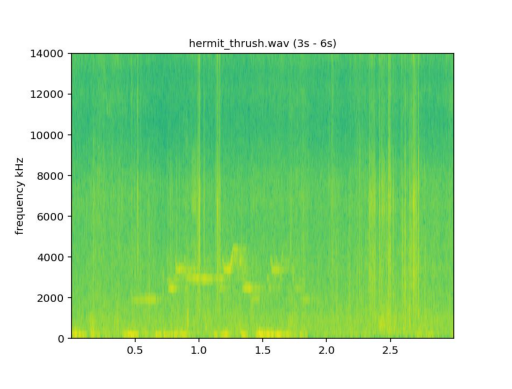

In [22]:
recording.analyze()
with tempfile.TemporaryDirectory() as temp_dir_name:
    recording.extract_detections_as_spectrogram(directory= temp_dir_name)
    images = os.listdir(temp_dir_name)
    for img_name in os.listdir(temp_dir_name):
        img_path = os.path.join(temp_dir_name, img_name)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    


In [23]:
pprint(recording.detections)

[{'common_name': 'Hermit Thrush',
  'confidence': 0.972859799861908,
  'end_time': 6.0,
  'extracted_spectrogram_path': '/tmp/tmpq1d8ltgh/hermit_thrush_3s-6s.jpg',
  'label': 'Catharus guttatus_Hermit Thrush',
  'scientific_name': 'Catharus guttatus',
  'start_time': 3.0}]
